In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 数据处理

### 导入数据集

In [2]:
mnist = tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

### 特征数据标准化

In [3]:
# 对图形images进行数字标准化
train_images = train_images /255.0
test_images = test_images / 255.0

### 标签数据独热编码

In [4]:
# 对标签labels 进行One-Hot Encoding
train_labels_ohe = tf.one_hot(train_labels,depth = 10).numpy()
test_labels_ohe = tf.one_hot(test_labels,depth = 10).numpy()

# 建立模型

### 建立序列模型

In [5]:
# 建立Sequential线性堆叠模型
model = tf.keras.models.Sequential()

### 添加输入层(平坦层，Flatten)

In [6]:
# 添加平坦层
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

### 添加隐藏层（密集层，Dense）

In [7]:
# 添加全连接层1
model.add(tf.keras.layers.Dense(units = 64,kernel_initializer='normal',activation='relu'))

In [8]:
# 添加全连接层2
model.add(tf.keras.layers.Dense(units = 32, kernel_initializer='normal'
                               ,activation='relu'))

# 添加输出层（还是密集层）

In [9]:
# 添加输出层
model.add(tf.keras.layers.Dense(10,activation='softmax'))

# 模型摘要

In [10]:
# 输出模型摘要
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


### 以上建模也可以一次性完成

In [14]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(64,activation=tf.nn.relu),
        tf.keras.layers.Dense(32,activation=tf.nn.relu),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
    ])

# 定义训练模式

- tf.keras.Model.compile 接受3个重要的参数：optimizer:优化器，可从tf.keras.optimizers中选择
- loss ：损失函数，可从tf.keras.losses中选择
- metrics: 评估指标，可从tf.keras.metrics

In [17]:
model.compile(optimizer = 'adam',# 优化器
             loss = 'categorical_crossentropy',#损失函数
             metrics=['accuracy'])#评估模型的方式

# 模型训练

In [18]:
#设置训练参数
train_epochs = 10 #训练轮数
batch_size = 30# 单次训练样本数（批次大小）

- tf.keras.Model.fit接受5个重要的参数:x:训练数据;y:目标数据（数据标签）;epochs:将训练数据迭代多少遍 batch_size : 批次的大小；validation_data:验证数据，可用于在训练过程中监控模型的性能。verbose: 训练过程的日志信息显示，0为不在标准输出流输出日志信息，1为输出进度条记录，2为每个epoch输出一行记录

In [20]:
# 训练模型
train_history = model.fit(train_images,train_labels_ohe,
                         validation_split=0.2,
                         epochs = train_epochs,
                         batch_size = batch_size,
                         verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 - 3s - loss: 0.3266 - accuracy: 0.9062 - val_loss: 0.1727 - val_accuracy: 0.9505
Epoch 2/10
48000/48000 - 3s - loss: 0.1515 - accuracy: 0.9550 - val_loss: 0.1379 - val_accuracy: 0.9596
Epoch 3/10
48000/48000 - 3s - loss: 0.1106 - accuracy: 0.9668 - val_loss: 0.1305 - val_accuracy: 0.9617
Epoch 4/10
48000/48000 - 3s - loss: 0.0873 - accuracy: 0.9733 - val_loss: 0.1190 - val_accuracy: 0.9627
Epoch 5/10
48000/48000 - 3s - loss: 0.0719 - accuracy: 0.9772 - val_loss: 0.1053 - val_accuracy: 0.9697
Epoch 6/10
48000/48000 - 3s - loss: 0.0597 - accuracy: 0.9814 - val_loss: 0.1106 - val_accuracy: 0.9688
Epoch 7/10
48000/48000 - 3s - loss: 0.0494 - accuracy: 0.9844 - val_loss: 0.1116 - val_accuracy: 0.9682
Epoch 8/10
48000/48000 - 3s - loss: 0.0416 - accuracy: 0.9865 - val_loss: 0.1115 - val_accuracy: 0.9693
Epoch 9/10
48000/48000 - 3s - loss: 0.0362 - accuracy: 0.9882 - val_loss: 0.1150 - val_accuracy: 0.9705
Epoch 10/10
48

In [21]:
train_history.history

{'loss': [0.32655713232292327,
  0.15148278195410966,
  0.11063669101858978,
  0.08732859048152022,
  0.07194817718453123,
  0.05968849847320598,
  0.04943890819944499,
  0.041647384443349436,
  0.03618164893327048,
  0.032590760845259865],
 'accuracy': [0.9061875,
  0.9549583,
  0.9668125,
  0.97333336,
  0.97725,
  0.981375,
  0.98441666,
  0.98645836,
  0.98822916,
  0.9895833],
 'val_loss': [0.17266335981781594,
  0.13792470091022552,
  0.1304869010031689,
  0.11897741306893295,
  0.10525725991057698,
  0.1106490295506228,
  0.11157914411152887,
  0.1114567186271779,
  0.11497180551436031,
  0.13168570521045694],
 'val_accuracy': [0.9505,
  0.95958334,
  0.96166664,
  0.9626667,
  0.96966666,
  0.96875,
  0.96825,
  0.96933335,
  0.9705,
  0.9673333]}

In [22]:
import matplotlib.pylab as plt
def show_train_history(train_history,train_metric,val_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[val_metric])
    plt.title('Train History')
    plt.ylabel(train_metric)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

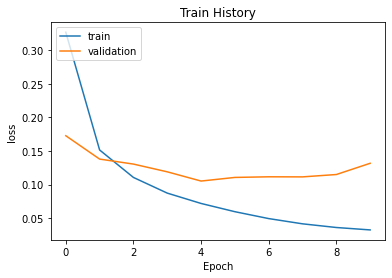

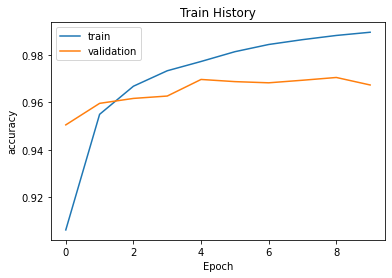

In [24]:
show_train_history(train_history,'loss','val_loss')
show_train_history(train_history,'accuracy','val_accuracy')

# 评估模型

In [25]:
# 评估模型
test_loss,test_acc  = model.evaluate(test_images,test_labels_ohe,verbose = 2)


10000/10000 - 0s - loss: 0.1047 - accuracy: 0.9727


In [27]:
yy = model.evaluate(test_images,test_labels_ohe,verbose = 2)

10000/10000 - 0s - loss: 0.1047 - accuracy: 0.9727


In [28]:
yy

[0.10470553053968179, 0.9727]

In [29]:
model.metrics_names

['loss', 'accuracy']

# 应用模型

In [30]:
# 进行预测
test_pred = model.predict(test_images)

In [31]:
test_pred.shape

(10000, 10)

In [32]:
#预测值
np.argmax(test_pred[0])

7

In [33]:
# 直接进行分类预测
test_pred = model.predict_classes(test_images)

In [34]:
test_pred[0]

7

In [35]:
#标签值
test_labels[0]

7